<a href="https://colab.research.google.com/github/ichencyj/AI_ML/blob/main/mlp0627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# tensorflow 2:
# a. keras已經是一份子
# b. gpu會直接辨別(cuda/cudnn還是要裝), 不需要安裝tensorflow-gpu
# c. eager mode(不用起tf.session就可以測試圖)
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


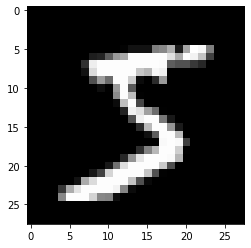

In [25]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 如果你要把色調反過來, _r
plt.imshow(x_train[0], cmap="gray")

In [26]:
#深度學習123, step 1 :係數個數準備好了（隨機係數）
# keras有兩種建立模型的方式
# a. Sequentital: 一層疊再一層的上面(限制比較大)
# b. Model: 每一層可以是任何形式去做(自由)
from tensorflow.keras.models import Sequential
# Dense(全連接層 Fully-Connected)# input 要在第一層告知
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784), 
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 輸出一個神經元(二元分類): BinaryCrossEntropy plog(1/q) + (1-p)log(1/1-q)
# 輸出多個神經元: CategoricalCrossEntropy p1log(1/q1) + p2log(1/q2)......
#compile最重要的就是要確定損失函數有多少
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [28]:
# 針對y做處理: 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print("BEFORE:", y_train[0])
print("AFTER:", y_train_cat[0])

BEFORE: 5
AFTER: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [29]:
# 針對x做處理: 28 * 28 -> 784(numpy reshape)
# reshape(60000, 784) == reshape(-1, 784) == reshape(60000, -1)
#Tensorflow 隨機有假設範圍, 先假定輸入範圍在0~1 (or -1 ~1)
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print("BEFORE:", x_train.shape)
print("AFTER:", x_train_norm.shape)

BEFORE: (60000, 28, 28)
AFTER: (60000, 784)


In [30]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
270/270 - 1s - loss: 0.4325 - accuracy: 0.8824 - val_loss: 0.1962 - val_accuracy: 0.9478 - 1s/epoch - 4ms/step
Epoch 2/50
270/270 - 1s - loss: 0.2033 - accuracy: 0.9429 - val_loss: 0.1391 - val_accuracy: 0.9637 - 647ms/epoch - 2ms/step
Epoch 3/50
270/270 - 1s - loss: 0.1500 - accuracy: 0.9577 - val_loss: 0.1257 - val_accuracy: 0.9647 - 645ms/epoch - 2ms/step
Epoch 4/50
270/270 - 1s - loss: 0.1203 - accuracy: 0.9665 - val_loss: 0.1030 - val_accuracy: 0.9707 - 629ms/epoch - 2ms/step
Epoch 5/50
270/270 - 1s - loss: 0.0995 - accuracy: 0.9720 - val_loss: 0.0953 - val_accuracy: 0.9728 - 637ms/epoch - 2ms/step
Epoch 6/50
270/270 - 1s - loss: 0.0828 - accuracy: 0.9760 - val_loss: 0.0936 - val_accuracy: 0.9745 - 642ms/epoch - 2ms/step
Epoch 7/50
270/270 - 1s - loss: 0.0719 - accuracy: 0.9797 - val_loss: 0.0811 - val_accuracy: 0.9762 - 623ms/epoch - 2ms/step
Epoch 8/50
270/270 - 1s - loss: 0.0612 - accuracy: 0.9825 - val_loss: 0.0826 - val_accuracy: 0.9772 - 619ms/epoch - 2ms/step
Epo

In [31]:
# 用10000筆資料做最終評估
# 輸出是[loss, accuracy]
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9767


[0.0787382647395134, 0.9767000079154968]

In [32]:
# 雙方向(axis=1), 最高機率的預測值, 10個裡面最高機率的是在第幾個
# 在tf用y_test_cat(十個機率), 出tf用y_test(確實答案)
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(i) for i in range(10)],
      index=["{}(真實)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),972,0,0,2,0,1,1,1,3,0
1(真實),0,1119,3,1,0,1,3,2,6,0
2(真實),6,1,1006,3,2,0,2,5,7,0
3(真實),0,0,5,984,1,6,0,4,6,4
4(真實),1,0,2,0,962,0,5,1,1,10
5(真實),3,0,0,6,1,872,5,0,2,3
6(真實),7,2,2,1,3,5,937,1,0,0
7(真實),1,3,9,5,3,0,0,998,0,9
8(真實),4,0,1,9,3,4,4,3,942,4
9(真實),3,4,0,8,6,4,1,6,2,975


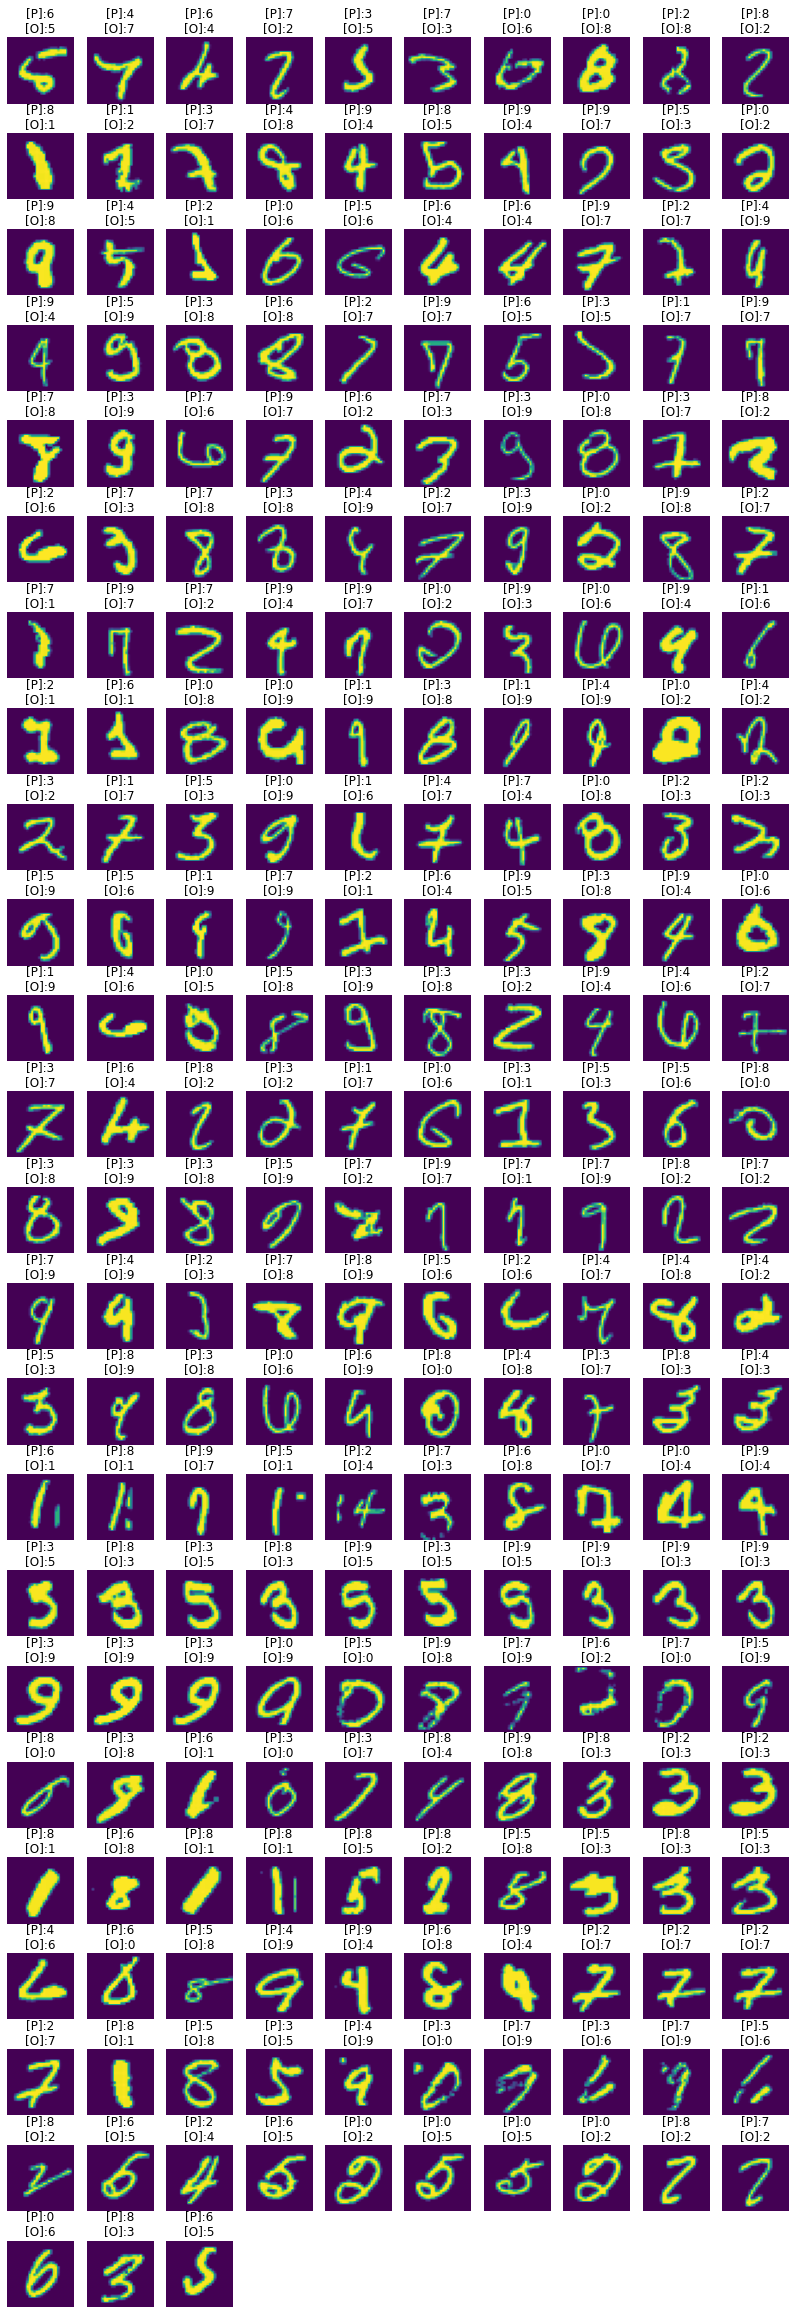

In [35]:
# 預測不對的idx
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# 預測不對的圖的正確答案
pre_false_label = y_test[idx]
# 預測不對的圖的預測值
pre_false_pred = pre[idx]
# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(pre_false_pred[i], pre_false_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])